# Investigate user data from the gym database

The gym chain Model Fitness is developing a customer interaction strategy based on analytical data.

Your task is to analyze them and come up with a customer retention strategy.

## Step 1

Download the data and read the general information

In [41]:
#import pandas and other important libraries
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

warnings.filterwarnings('ignore')

In [2]:
#read all input data and assign each dataset to a variable
try:
    gym = pd.read_csv('gym_churn_us.csv')
except:
    gym = pd.read_csv('/datasets/gym_churn_us.csv')

In [3]:
gym.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


## Step 2

Carry out exploratory data analysis (EDA)
- Look at the dataset: 
 - Does it contain any missing features?
 - Study the mean values and standard deviation using describe() method
- Look at the mean feature values in two groups:
 - For those who left (churn and for those who stayed using the groupby() method
- Plot bar histograms and feature distributions for those who left (churn) and those who stayed
- Build a correlation matrix and display it

### Look at the dataset

- Study mean values and standard deviation

In [4]:
#Checking info on our dataset, and seeing what needs to be changed
#gym.info()

#There doesn't seem to be any missing values, but there are some glaring issues that I can see from this.

#The first issue that I see is that Month_to_end_contract is a float, not an int.
#The next few issues is just to round up Avg_additional_charges_total, Avg_class_frequency_total and current month
#by two to make it look nice.
gym['Month_to_end_contract'] = gym['Month_to_end_contract'].astype('int64')
gym['Avg_additional_charges_total'] = gym['Avg_additional_charges_total'].round(2)
gym['Avg_class_frequency_total'] = gym['Avg_class_frequency_total'].round(2)
gym['Avg_class_frequency_current_month'] = gym['Avg_class_frequency_current_month'].round(2)
#print(gym.info())
gym.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943730,4.322750,3.724750,1.879035,1.76707,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355654,4.191297,3.749267,0.972305,1.05290,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.150000,1.000000,0.000000,0.000000,0.00000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.865000,1.000000,1.000000,1.180000,0.96000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220000,1.000000,3.000000,1.830000,1.72000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.947500,6.000000,5.000000,2.540000,2.51000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590000,12.000000,31.000000,6.020000,6.15000,1.000000


#### Conclusion

There weren't any missing values in the dataset, but I did find issues with some of the values under Avg_additional charges_total, Avg_clas_freuquency_total, and Avg_class_frequency_current_month. I fixed them by rounding by two, and now the dataset looks ready to be used. 

Looking at the mean values and standard deviation, we can see that generally the average additional charges total is around 14, and that the average lifetime is 3-4 months.

### Look at the mean feature values in churn groups

For those who left (churn and for those who stayed using the groupby() method

In [5]:
churn_data = gym.groupby('Churn').agg('mean')
churn_data

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445716,5.283089,4.711807,2.024917,2.027873
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082903,1.662582,0.990575,1.474939,1.044637


#### Conclusion

As we can see with the mean churn groups, gender is almost 50/50 between 1 and 0. 

Looking at the mean data, we can see that most customers that churn have a contract period of around 1-3 months. 

Another thing to note is that many customers that churn have around 1 month on overall lifetime compared to those that haven't which have around 5 months on lifetime.

### Plot bar histograms and feature distributions for those who left (churn) and those who stayed

In [6]:
gender_churn = gym.groupby('Churn').agg({'gender': 'count'}).reset_index()
gender_churn.columns = ['Churn', 'Customers']
gender_churn

,Churn,Customers
0,0,2939
1,1,1061


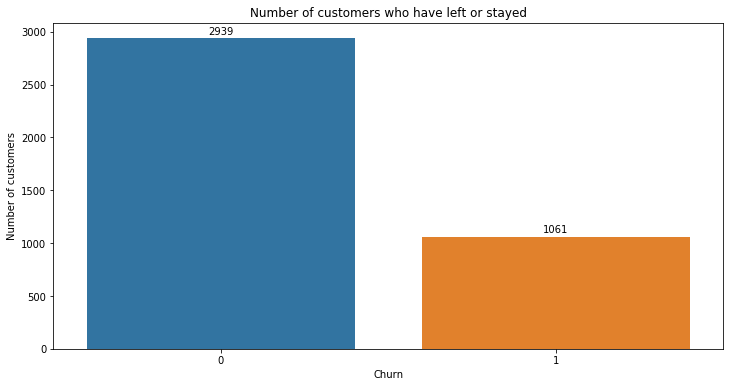

In [7]:
#plotting the graph
plt.figure(figsize=(12, 6))
gender_graph = sns.barplot(x='Churn', y='Customers', data=gender_churn)

#extra graph details
plt.title('Number of customers who have left or stayed')
plt.xlabel('Churn')
plt.ylabel('Number of customers')

#putting numbers on top of each bar, for easy reading
for bar in gender_graph.patches:
    gender_graph.annotate(format(bar.get_height(), '.0f'),
                       xy = (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                       ha = 'center',
                       va = 'center',
                       xytext = (0, 7),
                       textcoords = 'offset points')
plt.show()

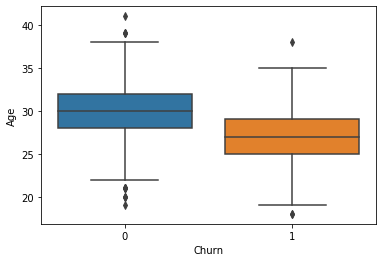

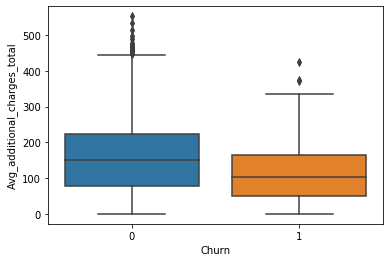

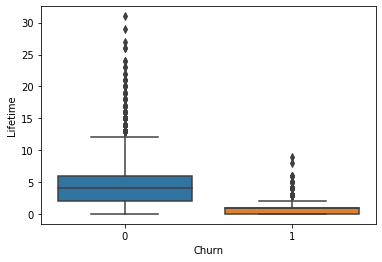

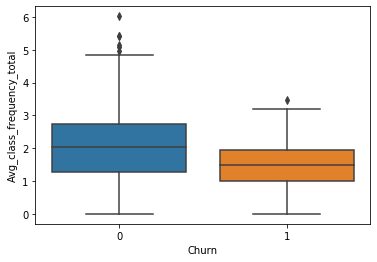

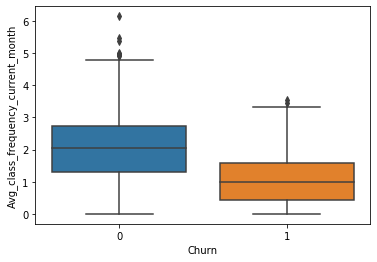

In [8]:
# plot paired distribution feature-traget variable diagrams for each feature
for col in gym.drop(['Churn', 'gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone', 'Contract_period',
                    'Group_visits', 'Month_to_end_contract'], axis = 1).columns:
    sns.boxplot(gym['Churn'], gym[col])
    plt.show()

#### Conclusion
Assuming that 0 represents the customers who have stayed, 2939 customers stayed compared to 1061 customers who have left.

Looking at the distribution graphs, most of the customers who have left are usually on the lower side of things in comparison to the customers who stayed. For example, those customers that have left don't have as high of a frequency in joining classes then those who stayed. Another easy comparison is the amonut spent. Those who leave don't spend nearly as much as those who stay.

### Build a correlation matrix and display it

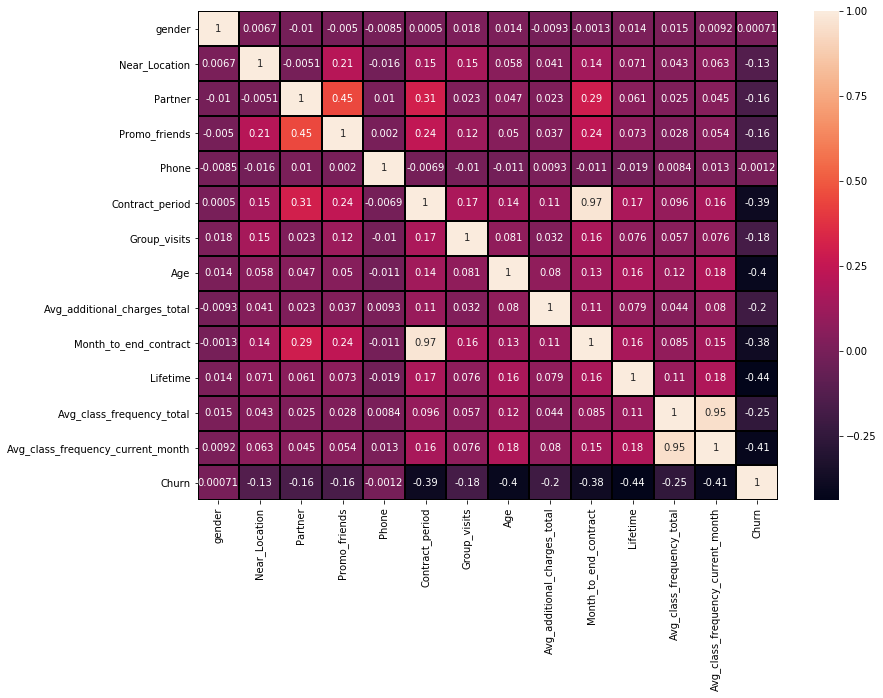

In [9]:
#making the correlation matrix
cm = gym.corr()
plt.figure(figsize = (13, 9))
sns.heatmap(cm, annot = True, linewidths=1, linecolor = 'black')
plt.show()

#### Conclusion

Judging from the correlation matrix, there isn't much we can get from here other than the fact that Month_to_end_contract and the Contract_period correlate pretty highly, as well as Avg_class_frequncy total and Avg_class_frequency_current_month also have a high correlation between the two variables.

### Conclusion

There isn't any missing features from the dataset, and very little needed to be done to fix the data. 

Looking at the mean values and standard deviation, we can see that generally the average additional charges total is around 14, and that the average lifetime is 3-4 months.

Another thing to note is that many customers that churn have around 1 month on overall lifetime compared to those that haven't which have around 5 months on lifetime. 

From here on, the data looks fine.

## Step 3
Build a binary classification model for customers where the target feature is the user's leaving next month.
- Divide the data into train and validation sets using the train_test_split() function.
- Train the model on the train set with two methods:
 - logistic regression
 - random forest
- Evaluate accuracy, precision, and recall for both models using the validation data. Use them to compare the models. 
 - Which model gave better results?

Remember to indicate the random_state parameter when dividing data and defining the algorithm.

### Divide the data into train and validation sets using the train_split() function

In [10]:
#dividing the data into features (the X matrix) and a target variable (y)
X = gym.drop('Churn', axis = 1)
y = gym['Churn']

#divide the data into train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

#### Conclusion

The train_test_split function is divided with the ratio of 80/20, with churn saved as the target variable. 

### Train the model on the train set with two methods:
- logistic regression
- random forest

Evaluate accuracy, precision, and recall for both models using the validation data. Use them to compare the models
- Which model gave better results?

In [11]:
#defining the function that will output our metrics
def print_all_metrics(y_true, y_pred, title = 'metric'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))

In [12]:
#train standardscaler on the train set
scaler = StandardScaler()
scaler.fit(X_train)

#transform train and test sets
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

In [13]:
#defining the algorithm for the logistic regression model
lr_model = LogisticRegression(random_state=0)
#train the model
lr_model.fit(X_train_st, y_train)
#use the trained moel to make predictions
lr_predictions = lr_model.predict(X_test_st)
#print all metrics
print_all_metrics(y_test, lr_predictions, title='Metrics for Logistic Regression:')

#defining the algorithm for the random forest model
rf_model = RandomForestClassifier(n_estimators = 100, random_state=0)
#train the model
rf_model.fit(X_train, y_train)
#use the trained model to make predictions
rf_predictions = rf_model.predict(X_test)
#print all metrics
print_all_metrics(y_test, rf_predictions, title='Metrics for Random Forest:')

Metrics for Logistic Regression:
	Accuracy: 0.92
	Precision: 0.85
	Recall: 0.83
Metrics for Random Forest:
	Accuracy: 0.91
	Precision: 0.84
	Recall: 0.80


### Conclusion

As we can see with the final model, metrics for Logistic Regression has higher Accuracy, Precision, and Recall. Therefore, Logistic Regression is what we will use

## Step 4

Set aside the column with data on churn and identify object (user) clusters:
- Standardize the data.
- Use the linkage() function to build a matrix of distances based on the standardized feature matrix and plot a dendrogram. Note: rendering the dendrogram may take time! Use the resulting graph to estimate the number of clusters you can single out.
- Train the clustering model with the K-means algorithm and predict customer clusters. (Let the number of clusters be n=5, so that it'll be easier to compare your results with those of other students. However, in real life, no one will give you such hints, so you'll have to decide based on the graph from the previous step.)
- Look at the mean feature values for clusters. Does anything catch your eye?
- Plot distributions of features for the clusters. Do you notice anything?
- Calculate the churn rate for each cluster (use the groupby() method). Do they differ in terms of churn rate? Which clusters are prone to leaving, and which are loyal?

### Plot a dendrogram

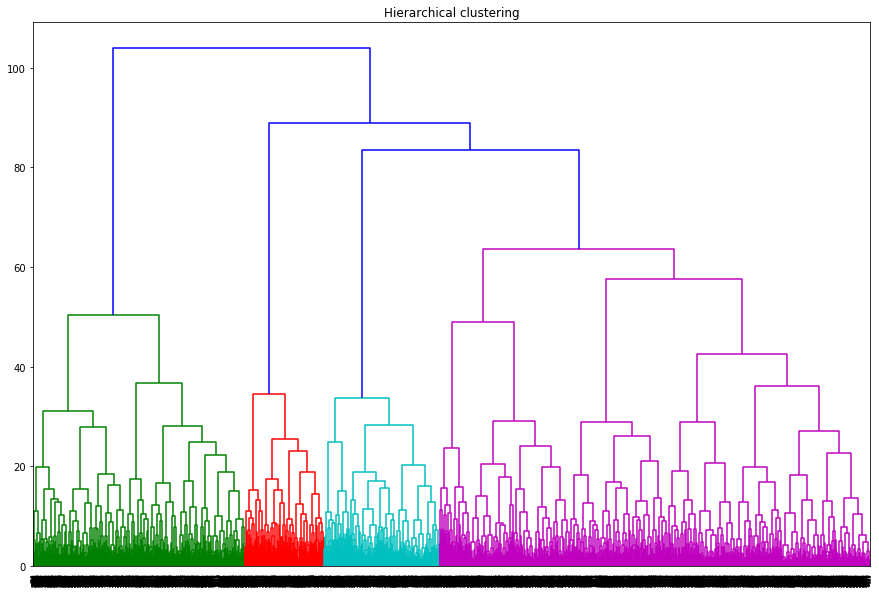

In [14]:
#standardizing data
sc = StandardScaler()
X_sc = sc.fit_transform(X)

linked = linkage(X_sc, method = 'ward')

plt.figure(figsize=(15,10))
dendrogram(linked, orientation='top')
plt.title('Hierarchical clustering')
plt.show()

#### Conclusion

From the Dendrogram, we can see that the suggested optimal number of clusters is 4, because there are 4 different colors on the plot. I will be using 5 instead for the kmeans algorithm, just because the instructions said so.

### Train the clustering model with the K-means algorithm and predict customer clusters.
- Look at the mean feature values for clusters. Does anything catch your eye?

In [15]:
#setting the number of clusters as 5, although the dendrogram shows 4 clusters.
km = KMeans(n_clusters = 5)
labels = km.fit_predict(X_sc)

#store cluster labels in the field of our dataset
gym['cluster_km'] = labels

gym.groupby(['cluster_km']).mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster_km,,,,,,,,,,,,,,
0,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208212,4.466321,3.940415,1.853912,1.723964,0.266839
1,0.565371,0.977621,0.342756,0.221437,1.0,2.554770,0.472320,30.122497,161.405371,2.353357,4.912839,2.811861,2.806502,0.074205
2,0.498531,0.960823,0.783546,0.575906,1.0,10.854065,0.539667,29.972576,161.129099,9.920666,4.723800,2.003173,1.996729,0.027424
3,0.483428,1.000000,0.355699,0.242522,1.0,1.959580,0.340340,28.143088,130.799757,1.869038,2.391269,1.233040,0.995247,0.519806
4,0.497041,0.000000,0.461538,0.078895,1.0,2.378698,0.218935,28.479290,135.631716,2.224852,2.812623,1.662229,1.479941,0.441815


#### Conclusion

From what we can see from the mean clusters, Contract_period, Month_to_end_contract, Avg_class_frequency_current_month, and Avg_class_frequency_total has quite different values between clusters. Perhaps these features are important to separating the clusters.

### Plot distributions of features for the clusters. 
- Do you notice anything?

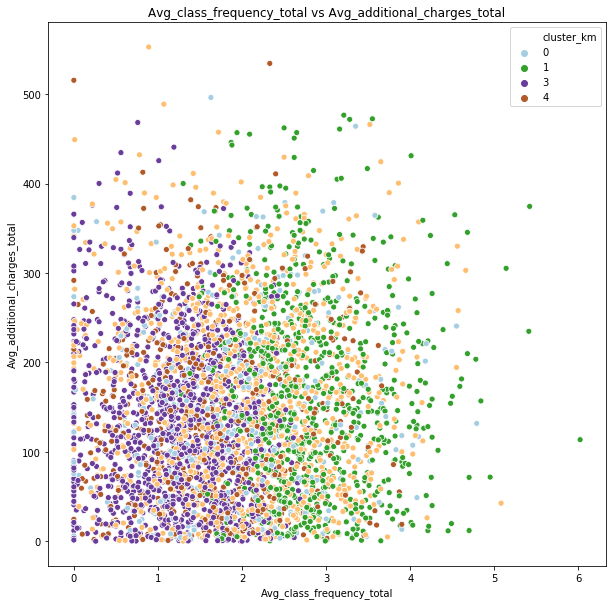

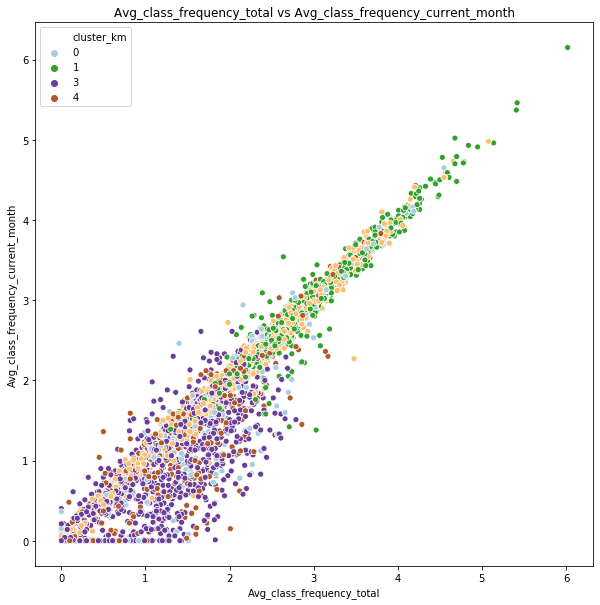

In [40]:
# define the function for rendering graphs of paired features for the clusters
def show_clusters_on_plot(df, x_name,y_name, cluster_name):
    plt.figure(figsize = (10,10))
    sns.scatterplot(df[x_name], df[y_name],
          hue = df[cluster_name], palette = 'Paired'
       )
    plt.title('{} vs {}'.format(x_name, y_name))
    plt.show()

show_clusters_on_plot(gym, 'Avg_class_frequency_total', 'Avg_additional_charges_total', 'cluster_km')
show_clusters_on_plot(gym, 'Avg_class_frequency_total', 'Avg_class_frequency_current_month', 'cluster_km')

#### Conclusion

The Avg_class_frequency_total, Avg_class_frequency_current_month and Avg_additional_charges_total turns out to be features for the clusters. With the displayed graphs, the groups don't really intersect with each other.

In contrast, the remaining features are fairly simillar and don't differ that much. The group visits, age, and partner don't really have much of a difference between customers.

### Calculate the churn rate for each cluster (use the groupby() method). 
- Do they differ in terms of churn rate? 
- Which clusters are prone to leaving, and which are loyal?

In [25]:
#making a groupby to find churn rate for each cluster
gym.groupby('cluster_km').agg({'Churn': 'mean'}).reset_index().round()

,cluster_km,Churn
0,0,0.0
1,1,0.0
2,2,0.0
3,3,1.0
4,4,0.0


#### Conclusion
From the groupby, it shows that cluster 3 is prone to leaving, while the other 4 seem to be loyal.

##  Come up with conclusions and basic recommendations on working with customers

Draw conclusions and formulate recommendations regarding the strategy for customer interaction and retention.

### Conclusion

In [44]:
gym.groupby('cluster_km').agg({'Churn': 'mean'}).reset_index().round()

,cluster_km,Churn
0,0,0.0
1,1,0.0
2,2,0.0
3,3,1.0
4,4,0.0


As we can see with this cluster table, we can see that customers under the third cluster are more prone to leave.

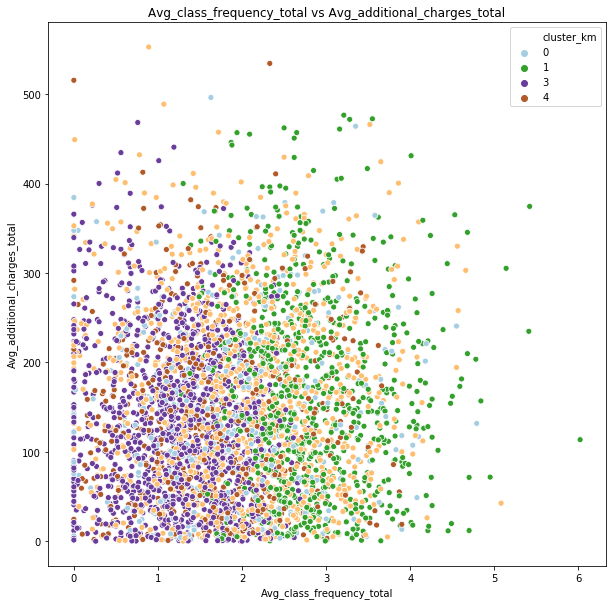

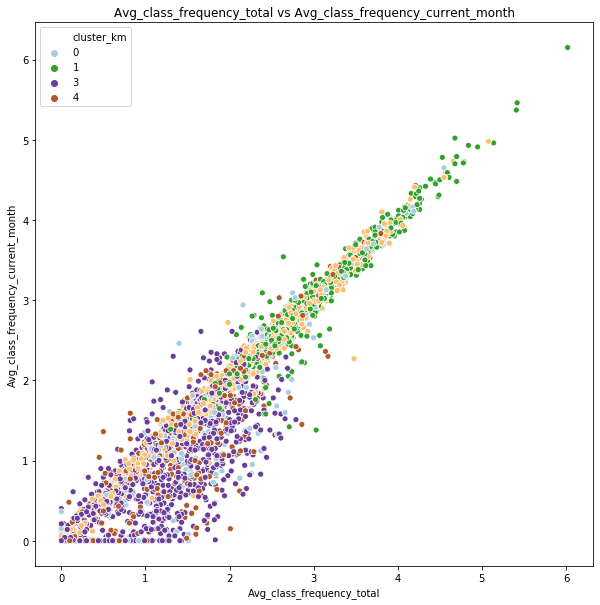

In [47]:
show_clusters_on_plot(gym, 'Avg_class_frequency_total', 'Avg_additional_charges_total', 'cluster_km')
show_clusters_on_plot(gym, 'Avg_class_frequency_total', 'Avg_class_frequency_current_month', 'cluster_km')

As we can see with the graphs, it shows that customers under cluster 3 generally have a lower average frequency of visits over the customers lifetime and are more likely to leave.

That means, it may be more important to encourage customers to return after visiting the first couple of times, maybe with a loyalty card where after a set number of visits, the customer get's a reward for coming back.

Another thing that we can do since most customers give us their phone number, we can send a text message for if they miss a week of coming to the gym or set number of days. That way, we get their engagement, and will most likely have them returning soon.

One final thing that we can do is to give out a survey to customers where after submitting the results online, can give the customers a chance to win in a raffel for let's say 2 weeks of free workout or something like that.